In [1]:
import pandas as pd


In [3]:
data=pd.read_csv("/content/diabetes.csv")
data.head()
data.shape

(768, 9)

In [4]:
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
features=data.drop(["Outcome"],axis='columns')
target=data["Outcome"]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=120,test_size=0.5)

In [7]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from lazypredict.Supervised import LazyClassifier
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,preds=clf.fit(x_train,x_test,y_train,y_test)
models

  3%|▎         | 1/29 [00:00<00:04,  6.62it/s]/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 48%|████▊     | 14/29 [00:01<00:00, 15.50it/s]/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: C

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.76,0.73,0.73,0.76,0.03
BaggingClassifier,0.74,0.71,0.71,0.74,0.06
NearestCentroid,0.72,0.71,0.71,0.72,0.02
LogisticRegression,0.76,0.71,0.71,0.75,0.02
AdaBoostClassifier,0.74,0.71,0.71,0.74,0.15
RandomForestClassifier,0.74,0.71,0.71,0.74,0.33
LinearSVC,0.75,0.70,0.70,0.74,0.08
LinearDiscriminantAnalysis,0.75,0.70,0.70,0.74,0.05
RidgeClassifierCV,0.75,0.70,0.70,0.74,0.02


In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

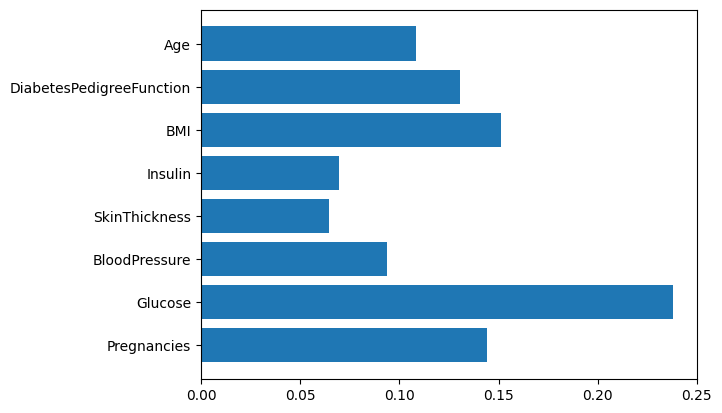

In [22]:
import matplotlib.pyplot as plt
x=features.columns
y=model.feature_importances_
plt.barh(x,y)
plt.show()

In [24]:
new_features=data[["Glucose","Pregnancies","Age","DiabetesPedigreeFunction"]]
#new model with 4 features
model1=RandomForestClassifier(n_estimators=10)
model1.fit(new_features,target)

RandomForestClassifier(n_estimators=10)

In [25]:
glu=int(input("enter glucose level: "))
preg=int(input("enter no of preg: "))
bmi=float(input("enter bmi: "))
age=int(input("enter age: "))
res=model1.predict([[glu,preg,bmi,age]])
print(res)

enter glucose level: 143
enter no of preg: 1
enter bmi: 25.3
enter age: 30
[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [27]:
import pickle
with open("db.model","wb") as f:
  pickle.dump(model,f)